#                                       Assignment-1

#                                   Narender Soppoju 

#                      soppojunarender2002@gmail.com

Supervised Machine Learning – Classification                                                                                     

Each row in CustomerChurn.csv corresponds to a bank’s credit card customer. Relevant information about this dataset is given below:

 

Number of Instances: 6237

Number of Attributes: 15 independent variables + 1 target variable

Independent Variables:
Customer_Age – Customer age in years Gender – M = Male, F = Female Dependent_count – Number of dependents

Education_Level – Highest education level of the customer

Marital_Status – Married, Single, Divorced

Income_Category – Annual income category of the customer

Card_Category – Type of card. Platinum cards offer more reward points than gold cards, which offers more reward points than silver cards. Blue cards offer the least number of reward points on purchases.

Months_on_book – Period of relationship (in months) with bank.

Total_Relationship_Count – Total number of products held by the customer (e.g., Saving account, Car loan, Credit Card, etc.)

Months_Inactive - Number of months inactive in the last 12 months Contacts_Count – Number of customer service contacts in the last 12 months Credit_Limit – credit limit on the credit card

Total_Revolving_Bal – Total revolving balance on the credit card (the portion of credit card spending that goes unpaid at the end of a billing cycle)

Total_Trans_Amt – Total transaction amount in the last 12 months

Total_Trans_Ct – Total transaction count in the last 12 months

 

Target Variable:
Attrition_Flag – Two labels - ‘Existing Customer’, ‘Attrited Customer’ (Customer who has churned)


# Task

The bank wants to use a classification model that can predict customer churn. Construct a suitable classification model for the bank by implementing Naïve Bayes, Logistic Regression, Decision Tree and support vector classification algorithms in Python.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory Data Analysis (What does all the analysis of numerical and categorical features reveal?)

In [2]:
data=pd.read_csv("C:/Users/soppoju narender/Desktop/FS-DataScience/ML_module/Assignment/BankChurners.csv")

In [3]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

In [6]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
data.drop(['CLIENTNUM','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'],axis=1,inplace=True)

In [9]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

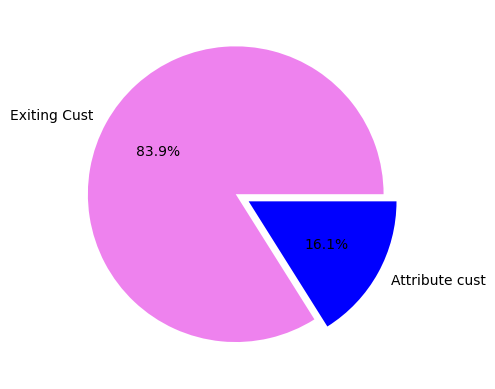

In [11]:
plt.pie(data['Attrition_Flag'].value_counts().values, explode = (0,0.1), labels = ["Exiting Cust","Attribute cust"], colors = ['violet','blue'], autopct = '%1.1f%%')
plt.show()

In [12]:
data['Attrition_Flag'].value_counts().values

array([8500, 1627], dtype=int64)

In [13]:
num_data=data.select_dtypes(include=np.number)
num_data

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,45,3,39,5,1,3,12691.0,777,1144,42
1,49,5,44,6,1,2,8256.0,864,1291,33
2,51,3,36,4,1,0,3418.0,0,1887,20
3,40,4,34,3,4,1,3313.0,2517,1171,20
4,40,3,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,15476,117
10123,41,2,25,4,2,3,4277.0,2186,8764,69
10124,44,1,36,5,3,4,5409.0,0,10291,60
10125,30,2,36,4,3,3,5281.0,0,8395,62


In [14]:
num_data.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

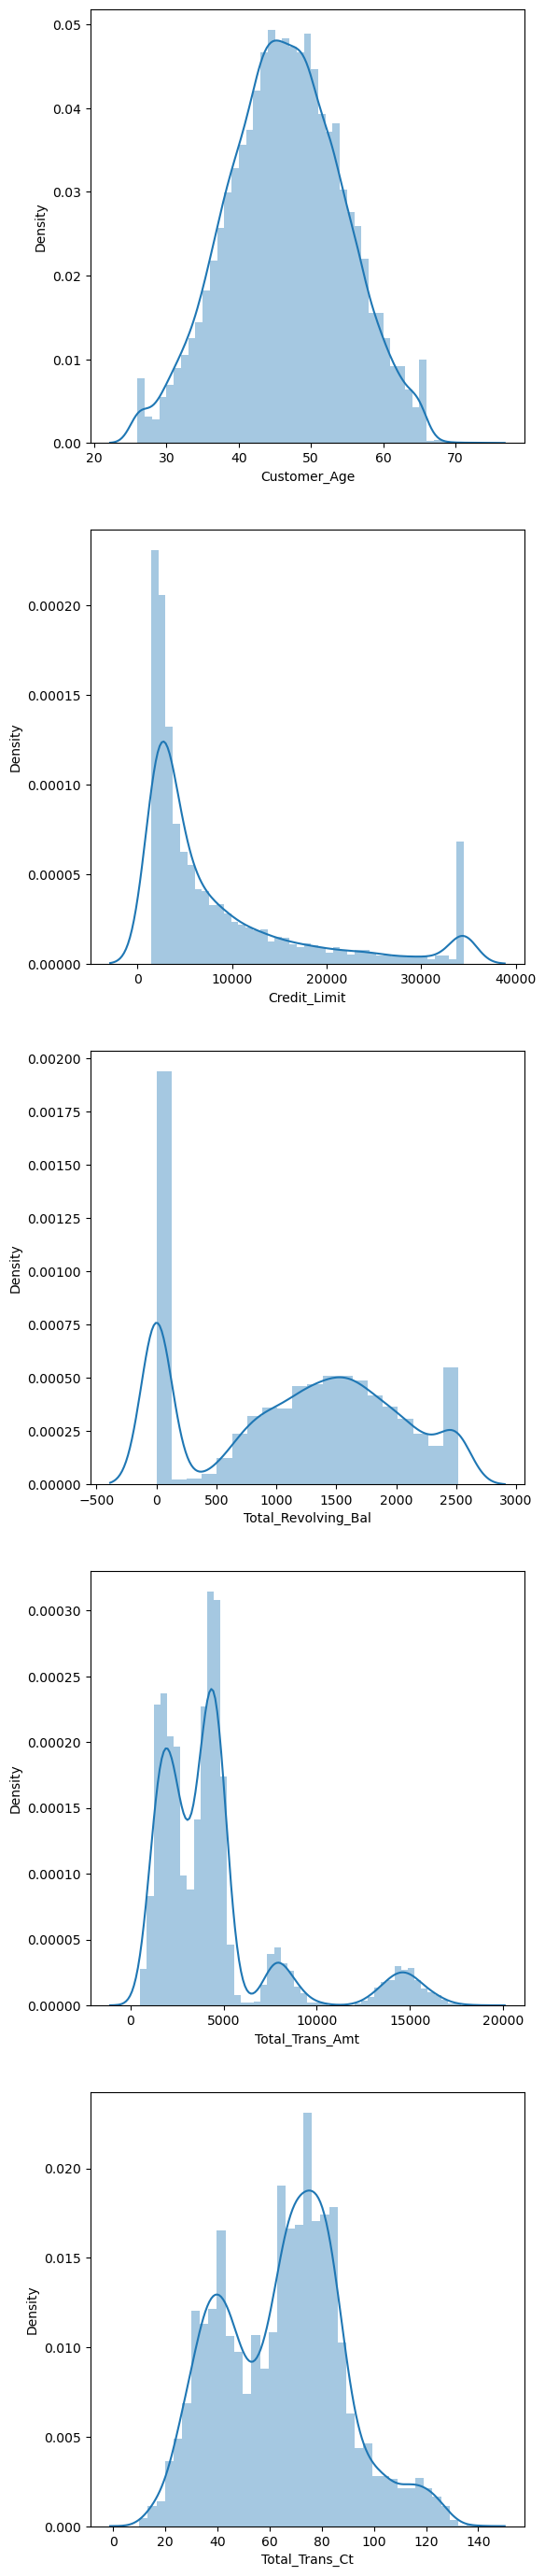

In [15]:
fig, axs = plt.subplots(5,1,figsize=(6,35))
plt1=sns.distplot(data['Customer_Age'],ax=axs[0])
plt1=sns.distplot(data['Credit_Limit'],ax=axs[1])
plt1=sns.distplot(data['Total_Revolving_Bal'],ax=axs[2])
plt1=sns.distplot(data[ 'Total_Trans_Amt'],ax=axs[3])
plt1=sns.distplot(data['Total_Trans_Ct'],ax=axs[4])
plt.show()

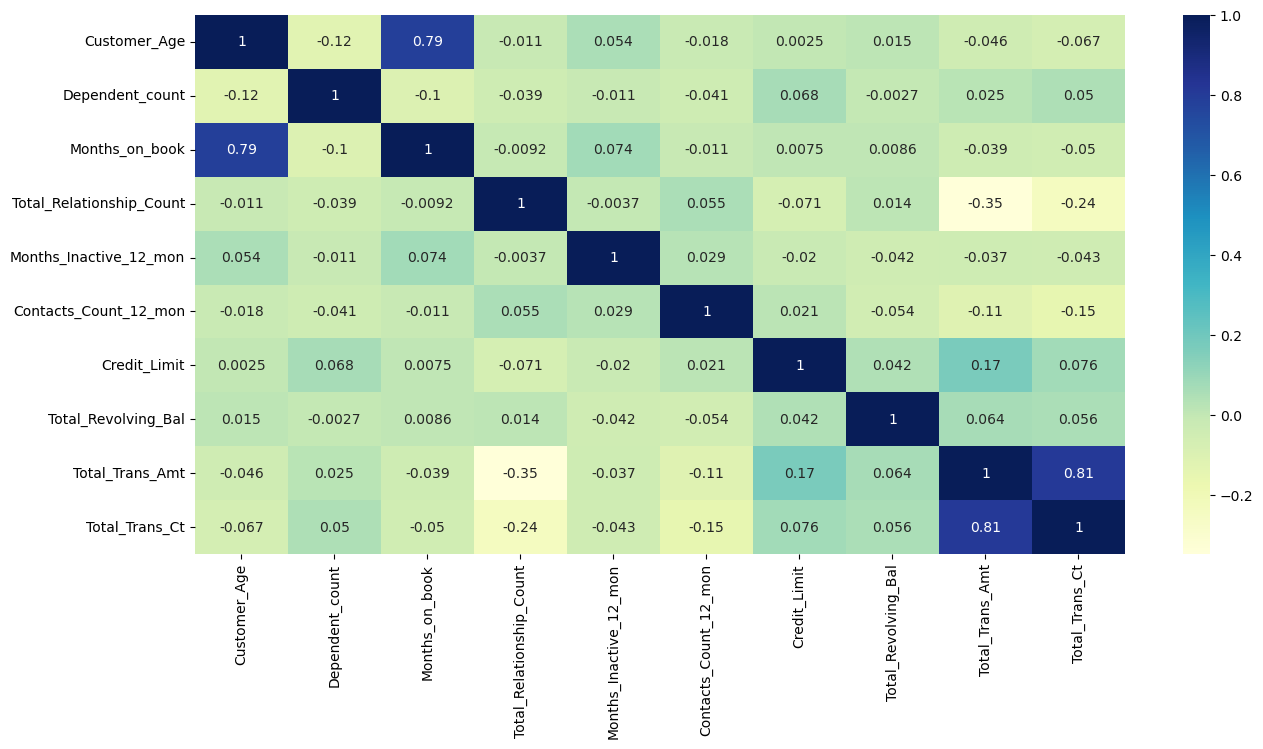

In [16]:
plt.figure(figsize=(15,7))
dataplot = sns.heatmap(num_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [17]:
data_cat=data.select_dtypes(include=object)
data_cat

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [18]:
data_cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

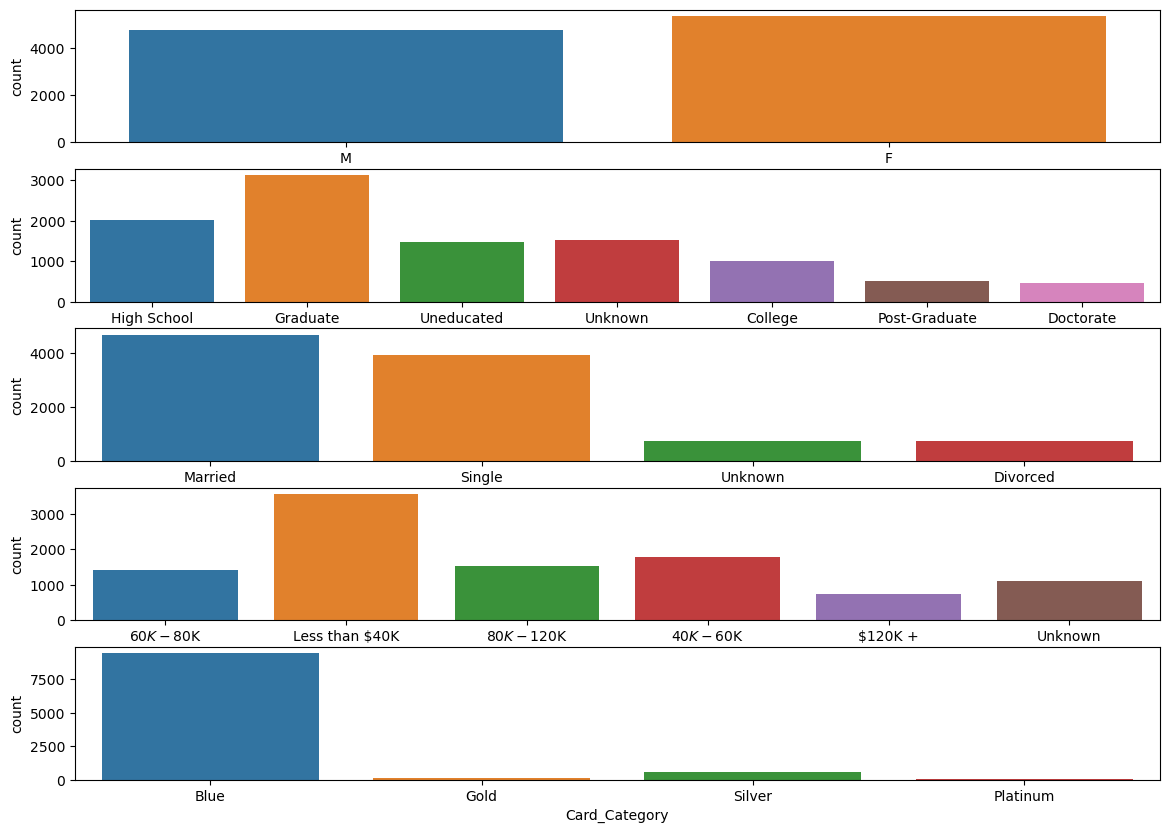

In [19]:
fig, ax = plt.subplots(5, 1, figsize = (14, 10))

cols = ['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
for i ,val in enumerate(cols):
    sns.countplot(x = val, data = data, ax = ax[i])

In [20]:
i_c={"$60K - $80K":70000,"Less than $40K":35000,"$80K - $120K":100000,"$40K - $60K":50000,"$120K +":120000,"Unknown":20000}

In [21]:
data["Income_Category"]=data["Income_Category"].replace(i_c)

In [22]:
data["Income_Category"].values

array([ 70000,  35000, 100000, ...,  35000,  50000,  35000], dtype=int64)

In [23]:
data.head(30)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,M,3,High School,Married,70000,Blue,39,5,1,3,12691.0,777,1144,42
1,Existing Customer,49,F,5,Graduate,Single,35000,Blue,44,6,1,2,8256.0,864,1291,33
2,Existing Customer,51,M,3,Graduate,Married,100000,Blue,36,4,1,0,3418.0,0,1887,20
3,Existing Customer,40,F,4,High School,Unknown,35000,Blue,34,3,4,1,3313.0,2517,1171,20
4,Existing Customer,40,M,3,Uneducated,Married,70000,Blue,21,5,1,0,4716.0,0,816,28
5,Existing Customer,44,M,2,Graduate,Married,50000,Blue,36,3,1,2,4010.0,1247,1088,24
6,Existing Customer,51,M,4,Unknown,Married,120000,Gold,46,6,1,3,34516.0,2264,1330,31
7,Existing Customer,32,M,0,High School,Unknown,70000,Silver,27,2,2,2,29081.0,1396,1538,36
8,Existing Customer,37,M,3,Uneducated,Single,70000,Blue,36,5,2,0,22352.0,2517,1350,24
9,Existing Customer,48,M,2,Graduate,Single,100000,Blue,36,6,3,3,11656.0,1677,1441,32


In [24]:
data['Income_Category'].dtype

dtype('int64')

In [25]:
data_cat=data.select_dtypes(include=object)
data_cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Card_Category'],
      dtype='object')

# 2.  Perform all the necessary Feature Engineering Techniques (Missing Value Treatment, Label Encoding, Imbalanced Data Handling, Feature Scaling and Feature Selection etc.)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Card_Category']
for i in cols:
    data[i]=le.fit_transform(data[i])

In [27]:
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1,45,1,3,3,1,70000,0,39,5,1,3,12691.0,777,1144,42
1,1,49,0,5,2,2,35000,0,44,6,1,2,8256.0,864,1291,33
2,1,51,1,3,2,1,100000,0,36,4,1,0,3418.0,0,1887,20
3,1,40,0,4,3,3,35000,0,34,3,4,1,3313.0,2517,1171,20
4,1,40,1,3,5,1,70000,0,21,5,1,0,4716.0,0,816,28
5,1,44,1,2,2,1,50000,0,36,3,1,2,4010.0,1247,1088,24
6,1,51,1,4,6,1,120000,1,46,6,1,3,34516.0,2264,1330,31
7,1,32,1,0,3,3,70000,3,27,2,2,2,29081.0,1396,1538,36
8,1,37,1,3,5,2,70000,0,36,5,2,0,22352.0,2517,1350,24
9,1,48,1,2,2,2,100000,0,36,6,3,3,11656.0,1677,1441,32


In [28]:
data.rename(columns={"Months_Inactive_12_mon":"Months_Inactive","Contacts_Count_12_mon":"Contacts_Count",},inplace=True)

In [29]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1,45,1,3,3,1,70000,0,39,5,1,3,12691.0,777,1144,42
1,1,49,0,5,2,2,35000,0,44,6,1,2,8256.0,864,1291,33
2,1,51,1,3,2,1,100000,0,36,4,1,0,3418.0,0,1887,20
3,1,40,0,4,3,3,35000,0,34,3,4,1,3313.0,2517,1171,20
4,1,40,1,3,5,1,70000,0,21,5,1,0,4716.0,0,816,28


In [30]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

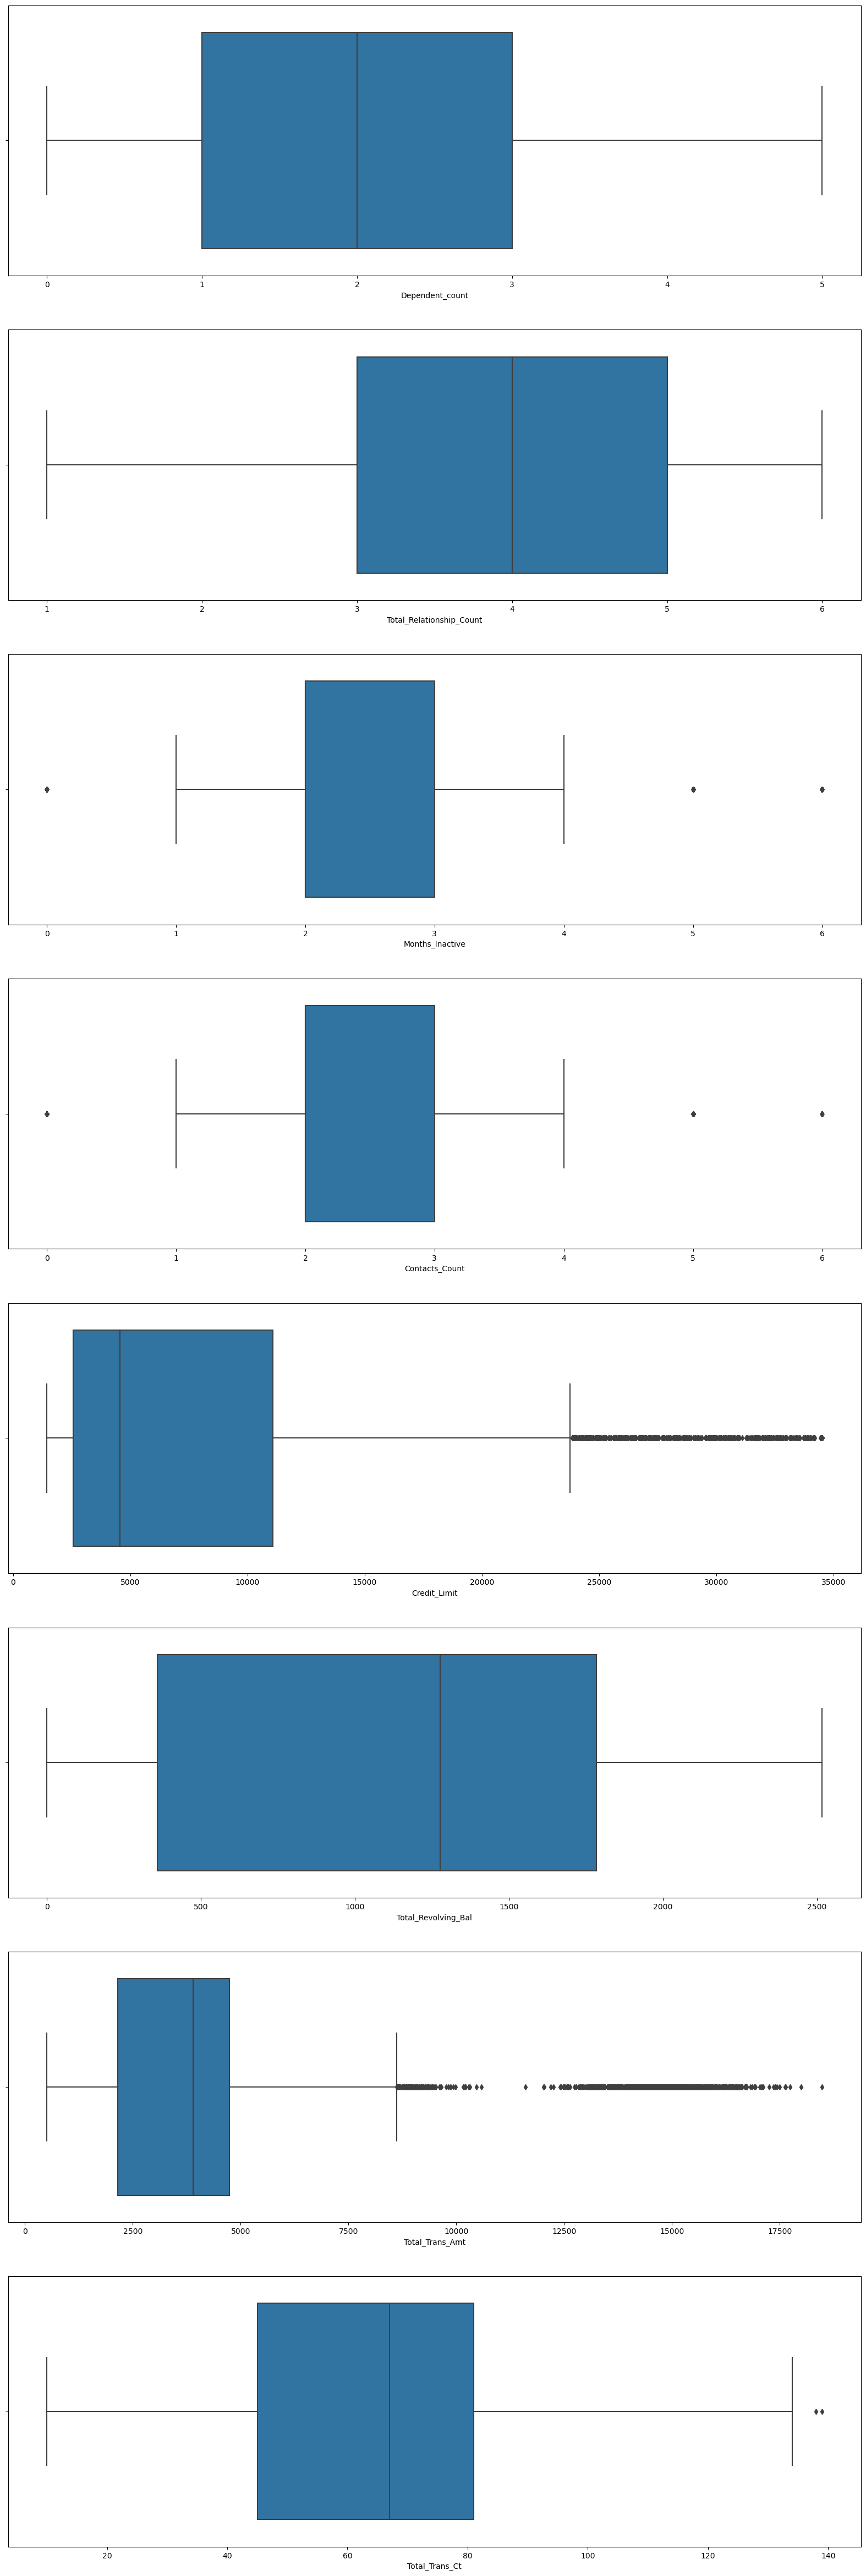

In [31]:
fig, ax = plt.subplots(8, 1, figsize = (20, 60))

cols =[ 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct']
for i ,val in enumerate(cols):
    sns.boxplot(x = val, data = data, ax = ax[i])

<AxesSubplot:xlabel='Credit_Limit'>

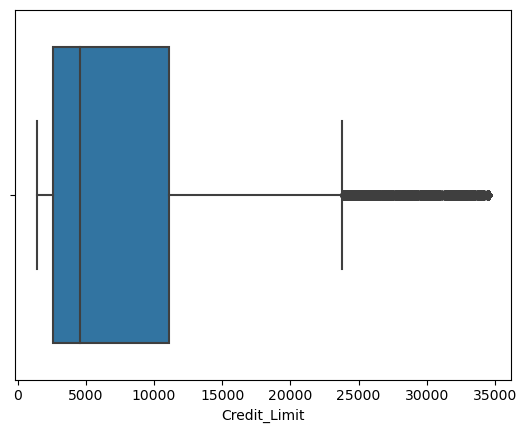

In [32]:
sns.boxplot(data["Credit_Limit"])

<AxesSubplot:xlabel='Total_Trans_Amt'>

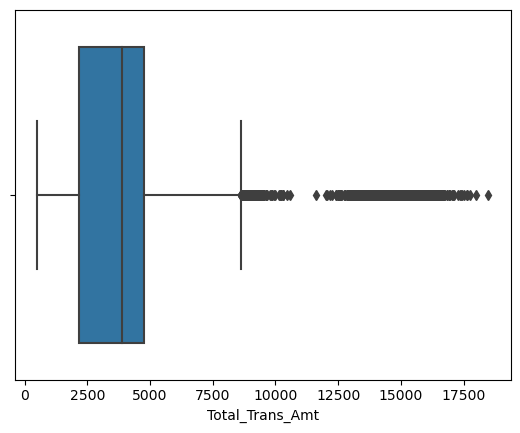

In [33]:
sns.boxplot(data['Total_Trans_Amt'])

In [34]:
Q1=data["Credit_Limit"].quantile(0.25)
Q3=data["Credit_Limit"].quantile(0.75)
IQR=Q3-Q1
IQR

8512.5

In [35]:
data=data[(data["Credit_Limit"]>=Q1-1.5*IQR)&(data["Credit_Limit"]<=Q3+1.5*IQR)]

<AxesSubplot:xlabel='Credit_Limit'>

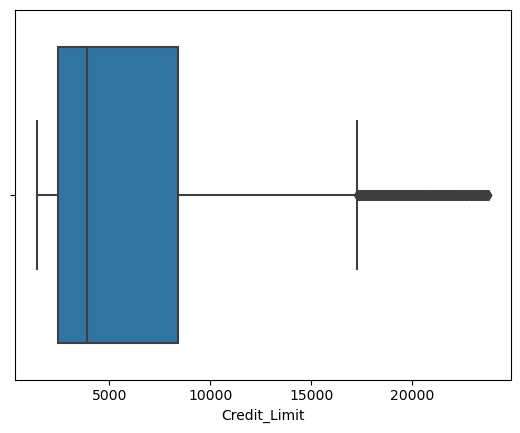

In [36]:
sns.boxplot(data["Credit_Limit"])

In [37]:
Q1=data['Total_Trans_Amt'].quantile(0.25)
Q3=data['Total_Trans_Amt'].quantile(0.75)
IQR=Q3-Q1
IQR

2536.0

In [38]:
data=data[(data['Total_Trans_Amt']>=Q1-3*IQR)&(data['Total_Trans_Amt']<=Q3+3*IQR)]

<AxesSubplot:xlabel='Total_Trans_Amt'>

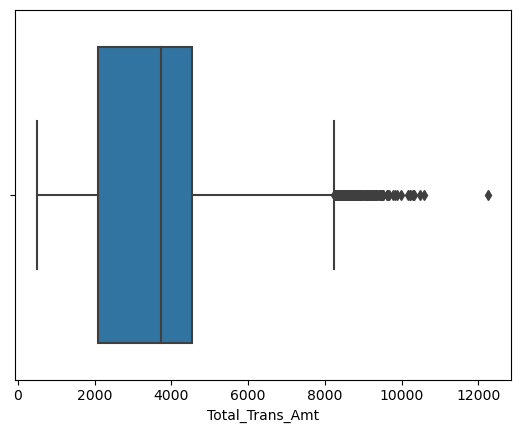

In [39]:
sns.boxplot(data['Total_Trans_Amt'])

In [40]:
from sklearn.feature_selection import chi2

In [41]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive',
       'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

In [42]:
x1=data[['Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive', 'Contacts_Count', 'Credit_Limit', 'Total_Revolving_Bal','Total_Trans_Amt', 'Total_Trans_Ct']]
y1=data['Attrition_Flag']

In [43]:
chi_score=chi2(x1,y1)
chi_score

(array([1.01628331e+00, 6.53398875e+00, 2.68363845e+00, 3.29059851e-01,
        8.96667286e-01, 2.16345911e+04, 2.16327663e-01, 8.03328217e-01,
        1.80682367e+02, 8.67560210e+01, 1.77429721e+02, 3.99806702e+04,
        3.47230658e+05, 1.75038856e+05, 8.33229888e+03]),
 array([3.13402244e-01, 1.05832372e-02, 1.01383849e-01, 5.66213207e-01,
        3.43676909e-01, 0.00000000e+00, 6.41852415e-01, 3.70100146e-01,
        3.43901057e-41, 1.22769471e-20, 1.76456770e-40, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

In [44]:
p_val=pd.Series(chi_score[1],index=x1.columns)
p_val

Customer_Age                3.134022e-01
Gender                      1.058324e-02
Dependent_count             1.013838e-01
Education_Level             5.662132e-01
Marital_Status              3.436769e-01
Income_Category             0.000000e+00
Card_Category               6.418524e-01
Months_on_book              3.701001e-01
Total_Relationship_Count    3.439011e-41
Months_Inactive             1.227695e-20
Contacts_Count              1.764568e-40
Credit_Limit                0.000000e+00
Total_Revolving_Bal         0.000000e+00
Total_Trans_Amt             0.000000e+00
Total_Trans_Ct              0.000000e+00
dtype: float64

In [45]:
indep=[]
for x in p_val.index:
    if p_val[x]<=0.5:
        print(x,"\n-->Reject Null Hypo")
    else:
        print(x,"\n-->Accept Null Hypo")
        indep.append(x)
print(indep)


Customer_Age 
-->Reject Null Hypo
Gender 
-->Reject Null Hypo
Dependent_count 
-->Reject Null Hypo
Education_Level 
-->Accept Null Hypo
Marital_Status 
-->Reject Null Hypo
Income_Category 
-->Reject Null Hypo
Card_Category 
-->Accept Null Hypo
Months_on_book 
-->Reject Null Hypo
Total_Relationship_Count 
-->Reject Null Hypo
Months_Inactive 
-->Reject Null Hypo
Contacts_Count 
-->Reject Null Hypo
Credit_Limit 
-->Reject Null Hypo
Total_Revolving_Bal 
-->Reject Null Hypo
Total_Trans_Amt 
-->Reject Null Hypo
Total_Trans_Ct 
-->Reject Null Hypo
['Education_Level', 'Card_Category']


In [46]:
data.drop(indep,axis=1,inplace=True)

In [47]:
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1,45,1,3,1,70000,39,5,1,3,12691.0,777,1144,42
1,1,49,0,5,2,35000,44,6,1,2,8256.0,864,1291,33
2,1,51,1,3,1,100000,36,4,1,0,3418.0,0,1887,20
3,1,40,0,4,3,35000,34,3,4,1,3313.0,2517,1171,20
4,1,40,1,3,1,70000,21,5,1,0,4716.0,0,816,28
5,1,44,1,2,1,50000,36,3,1,2,4010.0,1247,1088,24
8,1,37,1,3,2,70000,36,5,2,0,22352.0,2517,1350,24
9,1,48,1,2,2,100000,36,6,3,3,11656.0,1677,1441,32
10,1,42,1,5,3,120000,31,5,3,2,6748.0,1467,1201,42
11,1,65,1,1,1,50000,54,6,2,3,9095.0,1587,1314,26


In [48]:
X=data.drop('Attrition_Flag',axis=1)
Y=data['Attrition_Flag']

# 3.  Build the Supervised Learning Models (Logistic Regression, KNN, Naïve Bayes, SVM, and Decision Tree) 

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=30)


In [50]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6417, 13), (2139, 13), (6417,), (2139,))

# LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [52]:
lg.fit(X_train,Y_train)

LogisticRegression()

In [53]:
lg_pred=lg.predict(X_test)


In [54]:
train_accuracy = lg.score(X_train, Y_train)
test_accuracy = lg.score(X_test, Y_test)

In [55]:
print(train_accuracy,test_accuracy)

0.8591242013401901 0.8690977092099111


In [56]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [57]:
print("Accuracy Score: ", accuracy_score(Y_test, lg_pred))
print("f1 Score: ", f1_score(Y_test, lg_pred))
print("auc Score: ", roc_auc_score(Y_test,lg_pred))
print(classification_report(Y_test,lg_pred))

Accuracy Score:  0.8690977092099111
f1 Score:  0.9251336898395722
auc Score:  0.6663171841423683
              precision    recall  f1-score   support

           0       0.71      0.36      0.48       356
           1       0.88      0.97      0.93      1783

    accuracy                           0.87      2139
   macro avg       0.80      0.67      0.70      2139
weighted avg       0.85      0.87      0.85      2139



# K-Nearest Neighbour

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knnr = KNeighborsClassifier(n_neighbors = 10)
knnr.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [59]:
kn_pred=knnr.predict(X_test)

In [60]:
knnr.score(X_test,Y_test)

0.8863955119214586

In [61]:
train_accuracy = knnr.score(X_train, Y_train)
test_accuracy = knnr.score(X_test, Y_test)
print(train_accuracy,test_accuracy)

0.9002649213027895 0.8863955119214586



# Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [63]:
model.fit(X_train,Y_train)

GaussianNB()

In [64]:
nv_pred = model.predict(X_test)

In [65]:
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(train_accuracy,test_accuracy)

0.882967118591242 0.8943431510051426


In [66]:
print(accuracy_score(Y_test, nv_pred))

0.8943431510051426


In [67]:
print("Accuracy Score: ", accuracy_score(Y_test,nv_pred))
print("f1 Score: ", f1_score(Y_test,nv_pred))
print("auc Score: ", roc_auc_score(Y_test,nv_pred))
print(classification_report(Y_test, nv_pred))

Accuracy Score:  0.8943431510051426
f1 Score:  0.9386203150461705
auc Score:  0.7444080170398331
              precision    recall  f1-score   support

           0       0.77      0.52      0.62       356
           1       0.91      0.97      0.94      1783

    accuracy                           0.89      2139
   macro avg       0.84      0.74      0.78      2139
weighted avg       0.89      0.89      0.89      2139



# Support Vector Machine

In [68]:
from sklearn.svm import SVC
svr= SVC(C=10)

In [69]:
svr.fit(X_train,Y_train)

SVC(C=10)

In [70]:
train_accuracy = svr.score(X_train, Y_train)
test_accuracy = svr.score(X_test, Y_test)
print(train_accuracy,test_accuracy)

0.8265544647031323 0.83356708742403


In [71]:
sv_pred = svr.predict(X_test)


# Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [73]:
dt.score(X_test,Y_test)

0.9149135109864422

In [74]:
dt_pred = dt.predict(X_test)

In [75]:
train_accuracy = dt.score(X_train, Y_train)
test_accuracy = dt.score(X_test, Y_test)
print(train_accuracy,test_accuracy)

0.9998441639395356 0.9149135109864422


In [76]:
print("Accuracy Score: ", accuracy_score(Y_test,dt_pred))
print("f1 Score: ", f1_score(Y_test,dt_pred))
print("auc Score: ", roc_auc_score(Y_test,dt_pred))
print(classification_report(Y_test, dt_pred))

Accuracy Score:  0.9149135109864422
f1 Score:  0.948674562887761
auc Score:  0.8579129040186027
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       356
           1       0.95      0.94      0.95      1783

    accuracy                           0.91      2139
   macro avg       0.84      0.86      0.85      2139
weighted avg       0.92      0.91      0.92      2139



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

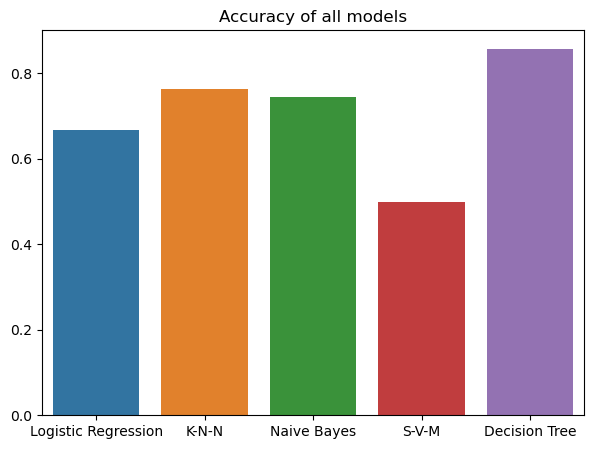

In [77]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Logistic Regression','K-N-N','Naive Bayes','S-V-M','Decision Tree'],y=[metrics.roc_auc_score(Y_test,lg_pred),metrics.roc_auc_score(Y_test,kn_pred),metrics.roc_auc_score(Y_test,nv_pred),metrics.roc_auc_score(Y_test,sv_pred),metrics.roc_auc_score(Y_test,dt_pred)])
ax.set_title('Accuracy of all models')
plt.show()

# model insights
     
     from these 5 models i strongly recommend Decision tree classifier
     
     because provide an effective method for making decisions because they lay out the problem and all the possible outcomes.
     

